Combined Dataset Sample:
                                                    title  \
22216   BREAKING: GOP Chairman Grassley Has Had Enoug...   
27917   Failed GOP Candidates Remembered In Hilarious...   
25007   Mike Pence’s New DC Neighbors Are HILARIOUSLY...   
1377   California AG pledges to defend birth control ...   
32476  AZ RANCHERS Living On US-Mexico Border Destroy...   

                                                    text       subject  \
22216  Donald Trump s White House is in chaos, and th...          News   
27917  Now that Donald Trump is the presumptive GOP n...          News   
25007  Mike Pence is a huge homophobe. He supports ex...          News   
1377   SAN FRANCISCO (Reuters) - California Attorney ...  politicsNews   
32476  Twisted reasoning is all that comes from Pelos...      politics   

                   date  label  
22216     July 21, 2017      0  
27917       May 7, 2016      0  
25007  December 3, 2016      0  
1377   October 6, 2017       1  
324

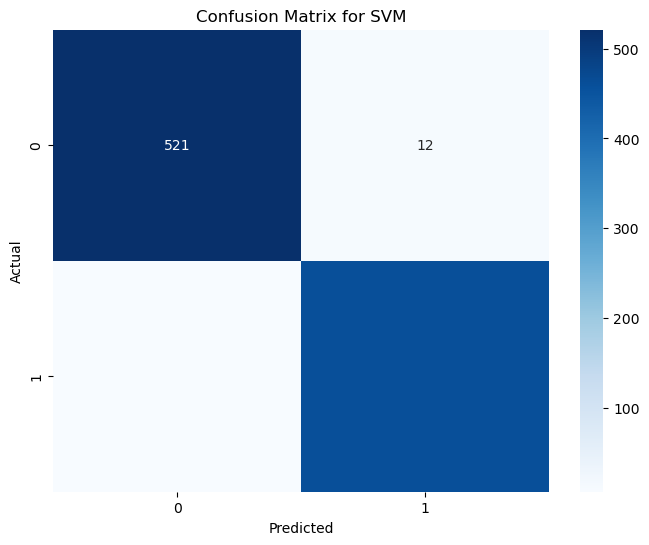

Models and vectorizer saved successfully.


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

# Load datasets (Ensure these files are available)
real_news = pd.read_csv(r"C:\Users\Hp\Downloads\Compressed\True.csv")
fake_news = pd.read_csv(r"C:\Users\Hp\Downloads\Compressed\Fake.csv")

# Add labels to datasets
real_news['label'] = 1  # 1 for real news
fake_news['label'] = 0  # 0 for fake news

# Combine the datasets and sample for faster execution
df = pd.concat([real_news, fake_news], ignore_index=True).sample(5000, random_state=42)

# Inspect the combined dataset
print("Combined Dataset Sample:\n", df.head())

# Drop missing values if any
df.dropna(inplace=True)

# Split dataset into features and labels
X = df['text']
y = df['label']

# Text preprocessing and vectorization using TF-IDF (Non-negative values required for MultinomialNB)
vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
X = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 2: Linear SVM (via SGD for faster performance)
svm_model = SGDClassifier(loss='hinge', max_iter=1000, tol=1e-3)
svm_model.fit(X_train, y_train)

# Evaluate SVM Model
svm_predictions = svm_model.predict(X_test)
print("\nSVM Classification Report:\n", classification_report(y_test, svm_predictions))
print("SVM Accuracy:", accuracy_score(y_test, svm_predictions))

# Confusion Matrix Visualization for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, svm_predictions), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Save the models if needed
joblib.dump(svm_model, 'svm_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')

print("Models and vectorizer saved successfully.")


In [30]:
import joblib

# Load the models and vectorizer
nb_model = joblib.load('naive_bayes_model.pkl')
svm_model = joblib.load('svm_model.pkl')
vectorizer = joblib.load('vectorizer.pkl')

# Input news text
news_text = input("Enter the news article text: ")

# Transform the input text using the vectorizer
news_vector = vectorizer.transform([news_text])

# Predict with Naive Bayes
nb_prediction = nb_model.predict(news_vector)[0]
svm_prediction = svm_model.predict(news_vector)[0]

# Display predictions
print("SVM Prediction:", "Real" if svm_prediction == 1 else "Fake")


Enter the news article text:  vfrom flask import Flask, request, render_template import joblib  # Load pre-trained models and vectorizer nb_model = joblib.load('naive_bayes_model.pkl') svm_model = joblib.load('svm_model.pkl') vectorizer = joblib.load('vectorizer.pkl')  app = Flask(__name__)  # Route for home page @app.route('/') def home():     return render_template('index.html')  # Route to handle predictions @app.route('/predict', methods=['POST']) def predict():     # Get the input text from the form     news_text = request.form['news_text']      # Transform the input text using the vectorizer     news_vector = vectorizer.transform([news_text])      # Predict using both models     nb_prediction = nb_model.predict(news_vector)[0]     svm_prediction = svm_model.predict(news_vector)[0]      # Create readable results     nb_result = "Real" if nb_prediction == 1 else "Fake"     svm_result = "Real" if svm_prediction == 1 else "Fake"      return render_template('index.html',              

SVM Prediction: Fake
